In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
import numpy as np

np.random.seed(314)

In [2]:
plt.rcParams['figure.figsize'] = [10, 7]

In [3]:
sp500_full = pd.read_csv("sp500.csv", parse_dates=['date'], index_col="date")
russell2000_full = pd.read_csv("russell2000.csv", parse_dates=['date'], index_col="date")
nasdaq_full = pd.read_csv("nasdaq.csv", parse_dates=['date'], index_col="date")
dow_full = pd.read_csv("dow.csv", parse_dates=['date'], index_col="date")

full = pd.concat([sp500_full["adjusted"], russell2000_full["adjusted"], nasdaq_full["adjusted"], dow_full["adjusted"]],
                 join="outer", axis=1)

inner = pd.concat([sp500_full["adjusted"], russell2000_full["adjusted"], nasdaq_full["adjusted"], dow_full["adjusted"]],
                 join="inner", axis=1)

full.columns = ["SP 500", "Russell", "Nasdaq", "Dow"]
inner.columns = ["SP 500", "Russell", "Nasdaq", "Dow"]

full_returns = inner.pct_change(axis=0).dropna()

<AxesSubplot:>

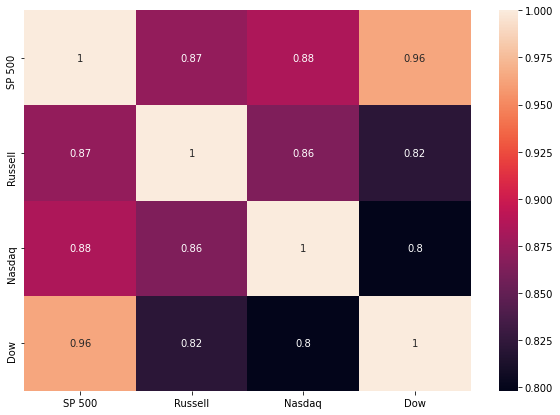

In [4]:
sns.heatmap(full_returns.corr(), annot=True)

<AxesSubplot:title={'center':'S&P 500 Daily Returns'}, xlabel='Date', ylabel='Returns'>

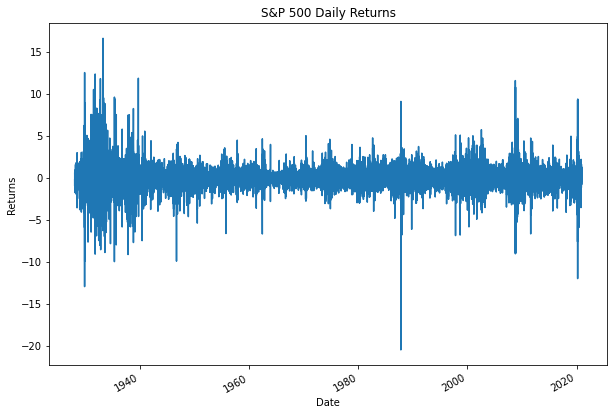

In [5]:
full["SP 500"].pct_change(axis=0).dropna().mul(100).plot(title="S&P 500 Daily Returns", ylabel="Returns", xlabel="Date")

<AxesSubplot:title={'center':'Russell 2000 Daily Returns'}, xlabel='Date', ylabel='Returns'>

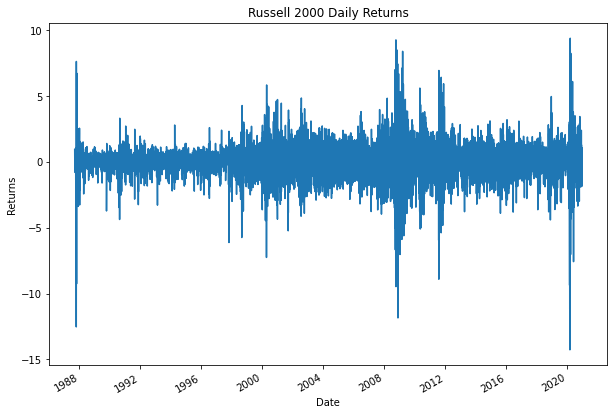

In [6]:
full["Russell"].pct_change(axis=0).dropna().mul(100).plot(title="Russell 2000 Daily Returns", ylabel="Returns", xlabel="Date")

<AxesSubplot:title={'center':'Nasdaq Daily Returns'}, xlabel='Date', ylabel='Returns'>

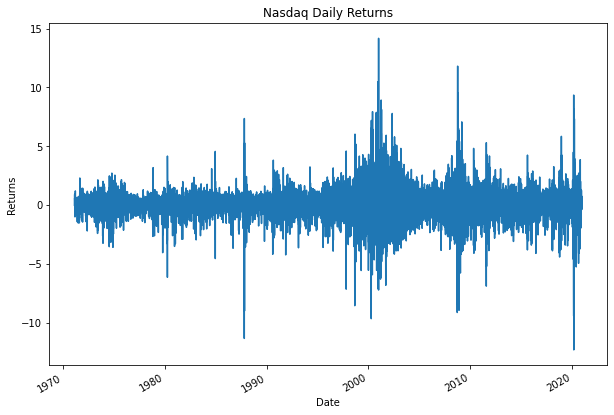

In [7]:
full["Nasdaq"].pct_change(axis=0).dropna().mul(100).plot(title="Nasdaq Daily Returns", ylabel="Returns", xlabel="Date")

<AxesSubplot:title={'center':'DJIA Daily Returns'}, xlabel='Date', ylabel='Returns'>

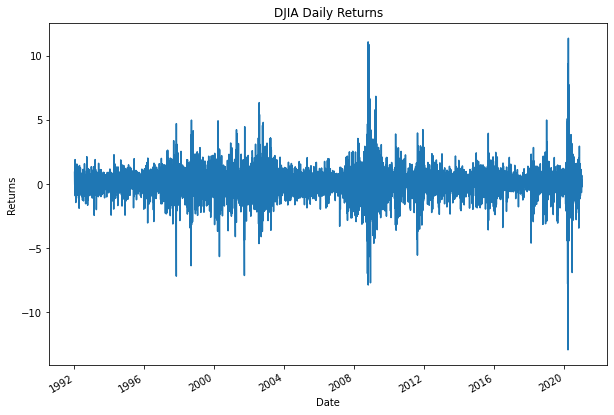

In [8]:
full["Dow"].pct_change(axis=0).dropna().mul(100).plot(title="DJIA Daily Returns", ylabel="Returns", xlabel="Date")

In [9]:
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=100)
data = full["SP 500"].pct_change(axis=0).dropna().mul(100)
data_temp = data.values.reshape(-1, 1)
model.fit(data_temp)
# z = model.predict(data_temp)

GaussianHMM(covariance_type='full', n_components=2, n_iter=100)

In [10]:
def predict_regimes(data, model):
    df = data.pct_change(axis=0).dropna().mul(100)
    df_temp = df.values.reshape(-1, 1)
    z = model.predict(df_temp)

    unique, counts = np.unique(z, return_counts=True)
    z_dict = dict(zip(unique, counts))

    df2 = df.to_frame()
    df2["Regime"] = z
    if z_dict[1] > z_dict[0]:
        df2["Regime"][df2["Regime"]==1] = 2 #temp
        df2["Regime"][df2["Regime"]==0] = 1
        df2["Regime"][df2["Regime"]==2] = 0

    return df2

In [11]:
def calc_posterior(data, model):
    df = data.pct_change(axis=0).dropna().mul(100)
    df_temp = df.values.reshape(-1, 1)
    post = model.predict_proba(df_temp)
    
    return post

In [12]:
def calc_stats(df):
    stats = {}
    keys = df["Regime"].unique()
    
    for key in keys:
        stats[key] = [df[df["Regime"]==key].iloc[:,0].mean(), df[df["Regime"]==key].iloc[:,0].std()]
    
    stats = pd.DataFrame(stats, index=["Mean", "SD"])
    
    return stats

In [13]:
pd.options.mode.chained_assignment = None
sp = predict_regimes(full["SP 500"],model)
rut = predict_regimes(full["Russell"],model)
nas = predict_regimes(full["Nasdaq"],model)
dow = predict_regimes(full["Dow"],model)
sp_post = calc_posterior(full["SP 500"],model)
rut_post = calc_posterior(full["Russell"],model)
nas_post = calc_posterior(full["Nasdaq"],model)
dow_post = calc_posterior(full["Dow"],model)

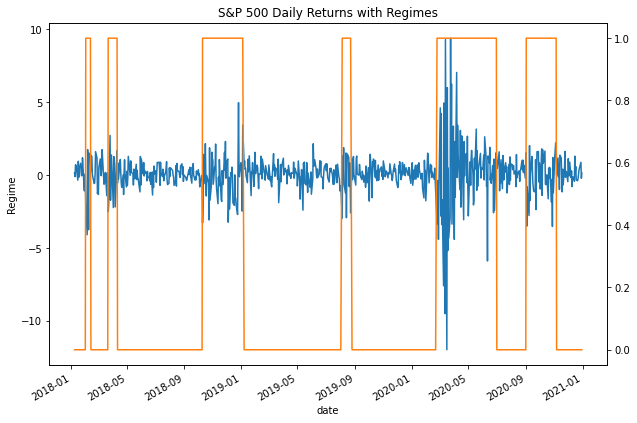

In [14]:
sp.iloc[-750:, 0].plot(title="S&P 500 Daily Returns with Regimes", label="Returns", ylabel="Returns")
sp.iloc[-750:, 1].plot(secondary_y=True, ylabel="Regime")
plt.show()

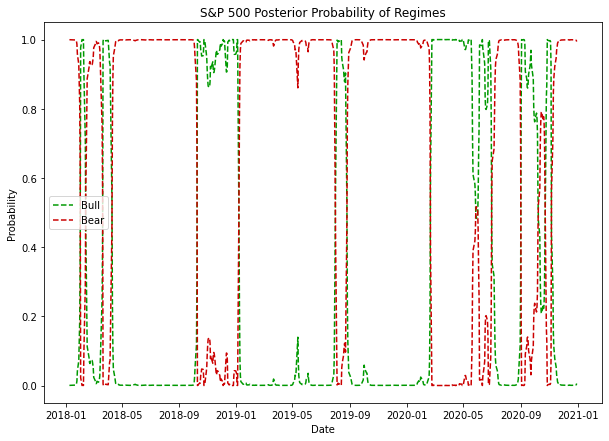

In [15]:
# Plot two lines of varying colors 
plt.plot(sp.index[-750:], sp_post[-750:,0], color='#009901', linestyle='dashed', label="Bull")
plt.plot(sp.index[-750:], sp_post[-750:,1], color='#cb0000', linestyle='dashed', label="Bear")

# Add labels
plt.legend(loc='center left')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('S&P 500 Posterior Probability of Regimes')
plt.show()

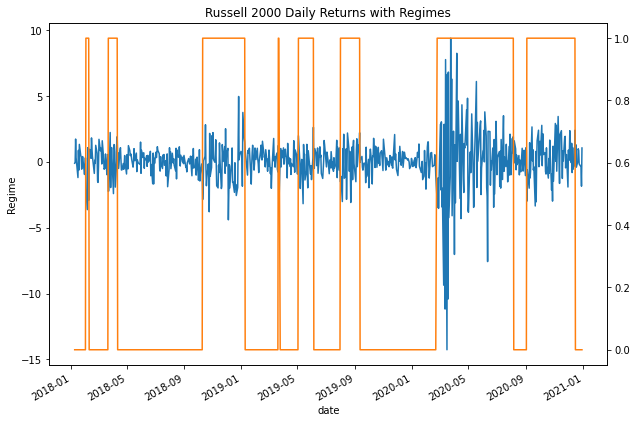

In [16]:
rut.iloc[-750:, 0].plot(title="Russell 2000 Daily Returns with Regimes", label="Returns", ylabel="Returns")
rut.iloc[-750:, 1].plot(secondary_y=True, ylabel="Regime")
plt.show()

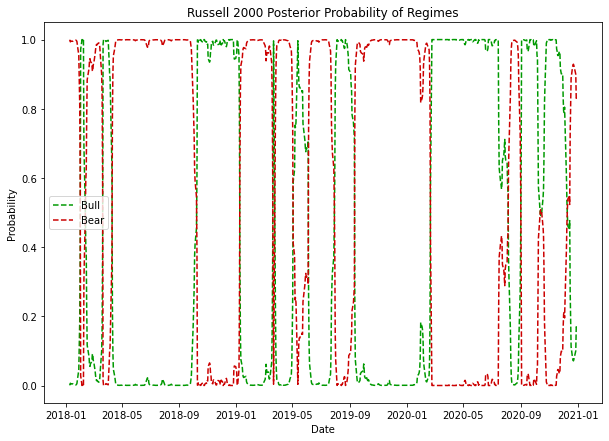

In [17]:
# Plot two lines of varying colors 
plt.plot(rut.index[-750:], rut_post[-750:,0], color='#009901', linestyle='dashed', label="Bull")
plt.plot(rut.index[-750:], rut_post[-750:,1], color='#cb0000', linestyle='dashed', label="Bear")

# Add labels
plt.legend(loc='center left')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Russell 2000 Posterior Probability of Regimes')
plt.show()

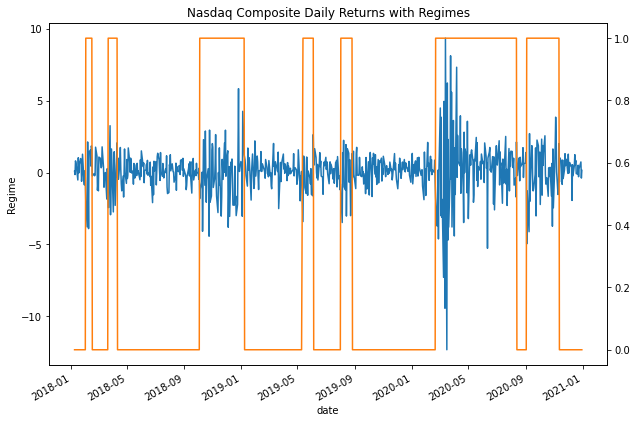

In [18]:
nas.iloc[-750:, 0].plot(title="Nasdaq Composite Daily Returns with Regimes", label="Returns", ylabel="Returns")
nas.iloc[-750:, 1].plot(secondary_y=True, ylabel="Regime")
plt.show()

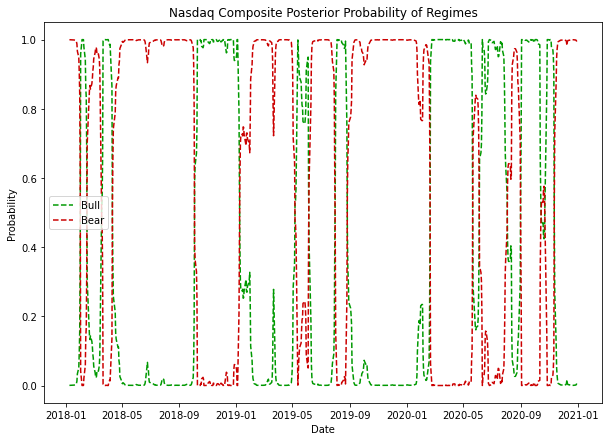

In [19]:
# Plot two lines of varying colors 
plt.plot(nas.index[-750:], nas_post[-750:,0], color='#009901', linestyle='dashed', label="Bull")
plt.plot(nas.index[-750:], nas_post[-750:,1], color='#cb0000', linestyle='dashed', label="Bear")

# Add labels
plt.legend(loc='center left')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('Nasdaq Composite Posterior Probability of Regimes')
plt.show()

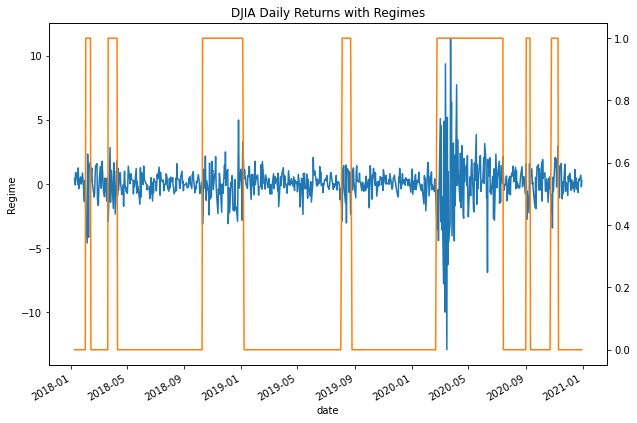

In [20]:
dow.iloc[-750:, 0].plot(title="DJIA Daily Returns with Regimes", label="Returns", ylabel="Returns")
dow.iloc[-750:, 1].plot(secondary_y=True, ylabel="Regime")
plt.show()

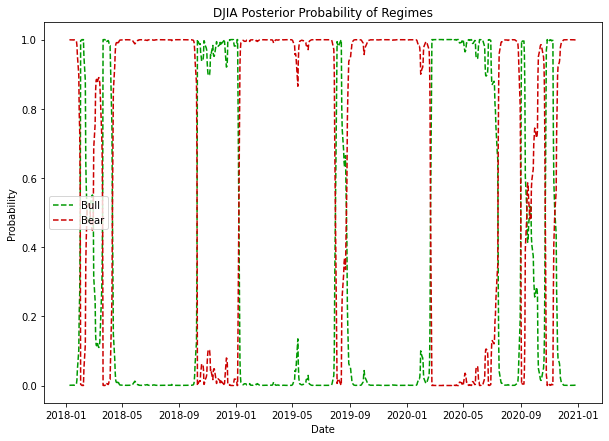

In [21]:
# Plot two lines of varying colors 
plt.plot(dow.index[-750:], dow_post[-750:,0], color="#009901", linestyle='dashed', label="Bull")
plt.plot(dow.index[-750:], dow_post[-750:,1], color='#cb0000', linestyle='dashed', label="Bear")

# Add labels
plt.legend(loc='center left')
plt.xlabel('Date')
plt.ylabel('Probability')
plt.title('DJIA Posterior Probability of Regimes')
plt.show()

In [22]:
calc_stats(sp)

,0,1
Mean,0.061666,-0.095192
SD,0.707415,2.268218


In [23]:
calc_stats(rut)

,0,1
Mean,0.090900,-0.068717
SD,0.729725,2.093932


In [24]:
calc_stats(nas)

,0,1
Mean,0.092760,-0.089833
SD,0.703041,2.168242


In [25]:
calc_stats(dow)

,0,1
Mean,0.064800,-0.073787
SD,0.719282,2.061603
